In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [2]:
df_rep = pd.read_csv("rep_candidates.csv", encoding="ISO-8859-1")
df_dem = pd.read_csv('dem_candidates.csv')

In [3]:
df_rep

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,31.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Bill Dahlin,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,1.5,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770,Harriet Hageman,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,21.5,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,Sam Galeotos,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,12.5,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,Foster Friess,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,25.6,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for col in df_rep.columns[10:]:
    df_rep[col] = df_rep[col].map({"Yes": True, 'No':False, None: False})
for col in df_dem.columns[13:]:
    df_dem[col] = df_dem[col].map({"Yes": True, 'No':False, None: False})

In [5]:
df_rep["Endorsements"] = df_rep[df_rep.columns[11:]].sum(axis=1)
df_dem["Endorsements"] = df_rep[df_rep.columns[13:]].sum(axis=1)

In [6]:
df_rep

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?,Endorsements
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,31.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Bill Dahlin,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,1.5,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
770,Harriet Hageman,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,21.5,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
771,Sam Galeotos,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,12.5,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
772,Foster Friess,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,25.6,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


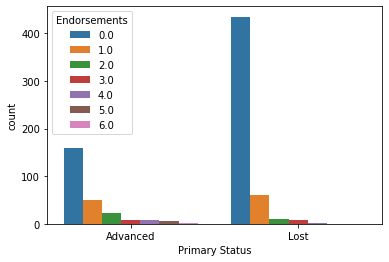

In [7]:
p = sns.countplot(x="Primary Status", hue="Endorsements", data = df_rep[df_rep['Primary Status'] != "On the Ballot"]);

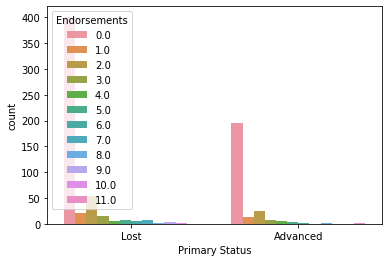

In [8]:
p = sns.countplot(x="Primary Status", hue="Endorsements", data = df_dem[df_dem['Primary Status'] != "On the Ballot"]);

In [9]:
df_rep.iloc[:, 11:25]

,Rep Party Support?,Trump Endorsed?,Bannon Endorsed?,Great America Endorsed?,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,NaN,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770,NaN,False,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,NaN,False,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dr = df_rep[['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Primary %', 'Won Primary',
       'Endorsements']]

In [11]:
dr

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,Won Primary,Endorsements
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.8,True,0.0
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,2.2,False,0.0
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,31.9,False,0.0
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,0.6,False,0.0
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,1.3,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
769,Bill Dahlin,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,1.5,False,0.0
770,Harriet Hageman,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,21.5,False,1.0
771,Sam Galeotos,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,12.5,False,1.0
772,Foster Friess,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,25.6,False,2.0


In [12]:
dd = df_dem[['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Primary %', 'Won Primary',
       'Endorsements']]

In [13]:
dd

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,Won Primary,Endorsements
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,3.420000,No,0.0
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,1.740000,No,0.0
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,3.270000,No,0.0
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,8.000000,No,0.0
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,28.980000,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
806,Talley Sergent,WV,U.S. House West Virginia District 2,Representative,Regular,5/8/18,Advanced,None,On the Ballot,62.570000,Yes,NaN
807,Janice Hagerman,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Lost,None,None,7.240000,No,NaN
808,Paul Davis,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Lost,None,None,15.960000,No,NaN
809,Richard Ojeda,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Advanced,None,On the Ballot,52.160000,Yes,NaN


In [14]:
df_house = pd.concat([dr, dd])

In [15]:
df_house = df_house[df_house["Office Type"] == 'Representative']

In [16]:
df_house

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,Won Primary,Endorsements
7,Steve Smith,AZ,U.S. House Arizona District 1,Representative,Regular,8/28/18,Lost,None,None,37.800000,False,3.0
8,Wendy Rogers,AZ,U.S. House Arizona District 1,Representative,Regular,8/28/18,Advanced,None,On the Ballot,43.400000,True,1.0
9,Tiffany Shedd,AZ,U.S. House Arizona District 1,Representative,Regular,8/28/18,Lost,None,None,18.800000,False,1.0
10,Lea Marquez Peterson,AZ,U.S. House Arizona District 2,Representative,Regular,8/28/18,Advanced,None,On the Ballot,33.600000,True,2.0
11,Casey Welch,AZ,U.S. House Arizona District 2,Representative,Regular,8/28/18,Lost,None,None,21.400000,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
806,Talley Sergent,WV,U.S. House West Virginia District 2,Representative,Regular,5/8/18,Advanced,None,On the Ballot,62.570000,Yes,NaN
807,Janice Hagerman,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Lost,None,None,7.240000,No,NaN
808,Paul Davis,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Lost,None,None,15.960000,No,NaN
809,Richard Ojeda,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Advanced,None,On the Ballot,52.160000,Yes,NaN


In [17]:
def find_district_num(name):
    my_list = name.split()
    regex = re.compile(r'[0-9]+')
    filtered = [i for i in my_list if regex.match(i)]
    return "".join(filtered).lower()

In [18]:
df_house["dis_num"] = df_house["District"].apply(find_district_num) 

In [19]:
df_house["district_identifier"] = df_house["State"] + "-" + df_house["dis_num"]

In [20]:
df_house["district_identifier"]

7      AZ-1
8      AZ-1
9      AZ-1
10     AZ-2
11     AZ-2
       ... 
806    WV-2
807    WV-3
808    WV-3
809    WV-3
810    WV-3
Name: district_identifier, Length: 1232, dtype: object

In [21]:
df_district_partisan = pd.read_csv("fivethirtyeight_partisan_lean_DISTRICTS.csv")

In [22]:
df_district_partisan = df_district_partisan.rename(columns = {"2021": "district_lean"})

In [23]:
df_house1 = df_house.merge(df_district_partisan, left_on="district_identifier", right_on="district")

In [24]:
df_districts_vs_candidates = df_house1.groupby('District').count().reset_index()[["District", "State"]].rename(columns = {"State":"num_candidates_in_race"}).set_index('District')
df_districts_vs_candidates

,num_candidates_in_race
District,
U.S. House Alabama District 1,2
U.S. House Alabama District 2,2
U.S. House Alabama District 3,2
U.S. House Alabama District 4,2
U.S. House Alabama District 5,1
...,...
U.S. House West Virginia District 2,2
U.S. House West Virginia District 3,11
U.S. House Wisconsin District 1,6


In [25]:
df_house2 = df_districts_vs_candidates.merge(df_house1, on="District")

In [26]:
df_house2

,District,num_candidates_in_race,Candidate,State,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,Won Primary,Endorsements,dis_num,district_identifier,district,district_lean
0,U.S. House Alabama District 1,2,Lizzetta Hill McConnell,AL,Representative,Regular,6/5/18,Lost,None,None,19.230000,No,0.0,1,AL-1,AL-1,-31.938510
1,U.S. House Alabama District 1,2,Robert Kennedy Jr.,AL,Representative,Regular,6/5/18,Advanced,None,On the Ballot,80.769997,Yes,5.0,1,AL-1,AL-1,-31.938510
2,U.S. House Alabama District 2,2,Audri Scott Williams,AL,Representative,Regular,6/5/18,Lost,None,None,39.560001,No,1.0,2,AL-2,AL-2,-33.012810
3,U.S. House Alabama District 2,2,Tabitha Isner,AL,Representative,Regular,6/5/18,Advanced,None,On the Ballot,60.439999,Yes,1.0,2,AL-2,AL-2,-33.012810
4,U.S. House Alabama District 3,2,Adia McClellan Winfrey,AL,Representative,Regular,6/5/18,Lost,None,None,34.240002,No,3.0,3,AL-3,AL-3,-35.236480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,U.S. House Wisconsin District 1,6,Kevin Steen,WI,Representative,Regular,8/14/18,Lost,None,None,10.500000,False,1.0,1,WI-1,WI-1,-13.712130
1209,U.S. House Wisconsin District 1,6,Brad Boivin,WI,Representative,Regular,8/14/18,Lost,None,None,1.500000,False,0.0,1,WI-1,WI-1,-13.712130
1210,U.S. House Wisconsin District 3,1,Steve Toft,WI,Representative,Regular,8/14/18,Advanced,None,On the Ballot,100.000000,True,2.0,3,WI-3,WI-3,-8.715729
1211,U.S. House Wisconsin District 4,2,Tim Rogers,WI,Representative,Regular,8/14/18,Advanced,None,On the Ballot,55.600000,True,0.0,4,WI-4,WI-4,49.020670


In [27]:
df_fec = pd.read_csv("candidate_summary_2018.csv")

In [28]:
df_fec

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/H8TX05052/?...,"ASHBY, KEN",H8TX05052,H,TX,4.0,LIB,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,NaN
1,https://www.fec.gov/data/candidate/S6OH00288/?...,"ECKHART, DON ELIJAH",S6OH00288,S,OH,0.0,REP,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,NaN
2,https://www.fec.gov/data/candidate/S8CA00499/?...,"ZIESING, MICHAEL VINCENT",S8CA00499,S,CA,0.0,GRE,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,NaN
3,https://www.fec.gov/data/candidate/H6NJ13191/?...,"SIRES, ALBIO",H6NJ13191,H,NJ,8.0,DEM,INCUMBENT,460108.57,596546.56,...,0.00,0.0,500.0,500.00,98504.05,459357.05,437542.51,290287.08,0.0,01/01/2017
4,https://www.fec.gov/data/candidate/H6MI03172/?...,"SMITH, DOUGLAS MARK MR. JR.",H6MI03172,H,MI,3.0,IND,CHALLENGER,0.00,3873.60,...,0.00,0.0,0.0,0.00,0.00,0.00,3873.60,3873.60,0.0,01/01/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,https://www.fec.gov/data/candidate/S8PA00254/?...,"KERNS JR, DALE RONALD",S8PA00254,S,PA,0.0,LIB,CHALLENGER,214702.58,202162.62,...,0.00,0.0,0.0,0.00,0.00,191400.62,191926.62,0.00,0.0,11/16/2016
3793,https://www.fec.gov/data/candidate/S2NV00183/?...,"HELLER, DEAN",S2NV00183,S,NV,0.0,REP,INCUMBENT,12888327.96,14089975.47,...,254586.11,0.0,30850.0,285436.11,39577.42,11863772.89,13711842.62,1366283.00,0.0,01/01/2017
3794,https://www.fec.gov/data/candidate/H2MI11133/?...,"BENTIVOLIO, KERRY",H2MI11133,H,MI,11.0,REP,OPEN,37273.54,34656.38,...,0.00,0.0,0.0,0.00,3933.62,35223.54,30722.76,0.00,0.0,10/01/2017
3795,https://www.fec.gov/data/candidate/H4GA12051/?...,"YU, EUGENE MR.",H4GA12051,H,GA,12.0,REP,CHALLENGER,65980.00,23716.15,...,0.00,0.0,0.0,0.00,0.00,32980.00,23716.15,0.00,0.0,07/01/2016


In [29]:
def remove_bad_list_item_dr(name):
    my_list = name.split()
    regex = re.compile(r'.*\)|.*"|[a-zA-Z]\.')
    filtered = [i for i in my_list if not regex.match(i)]
    return " ".join(filtered).lower()

In [30]:
def remove_bad_words_contribution(name):
    my_list = name.split()
    regex = re.compile(r'.*\)|.*"|[a-zA-Z]\.|[a-zA-Z]+\.')
    filtered = [i for i in my_list if not regex.match(i)]
    step1 = " ".join(filtered)
    filtered2 = first_to_last([w for w in step1.split(' ') if len(w) >= 2])
    step2 = " ".join(filtered2)
    return re.sub(",","",step2).lower()

In [31]:
def first_to_last(ls1):
    last = ls1[0]
    ls1.remove(ls1[0])
    ls1 = ls1 + [last]
    return ls1 

In [32]:
df_house2["clean_name"] = df_house2["Candidate"].apply(remove_bad_list_item_dr)

In [33]:
df_fec["clean_name"] = df_fec["Cand_Name"].apply(remove_bad_words_contribution)

In [34]:
df_house2[df_house2["clean_name"] == "ronald kerns"]

,District,num_candidates_in_race,Candidate,State,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,Won Primary,Endorsements,dis_num,district_identifier,district,district_lean,clean_name


In [35]:
df_fec[df_fec["clean_name"] == "jr dale ronald kerns"]

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date,clean_name
3792,https://www.fec.gov/data/candidate/S8PA00254/?...,"KERNS JR, DALE RONALD",S8PA00254,S,PA,0.0,LIB,CHALLENGER,214702.58,202162.62,...,0.0,0.0,0.0,0.0,191400.62,191926.62,0.0,0.0,11/16/2016,jr dale ronald kerns


In [36]:
df_house3 = df_house2.merge(df_fec, on="clean_name")

In [37]:
df_house3.columns

Index(['District', 'num_candidates_in_race', 'Candidate', 'State',
       'Office Type', 'Race Type', 'Race Primary Election Date',
       'Primary Status', 'Primary Runoff Status', 'General Status',
       'Primary %', 'Won Primary', 'Endorsements', 'dis_num',
       'district_identifier', 'district', 'district_lean', 'clean_name',
       'Link_Image', 'Cand_Name', 'Cand_Id', 'Cand_Office', 'Cand_Office_St',
       'Cand_Office_Dist', 'Cand_Party_Affiliation',
       'Cand_Incumbent_Challenger_Open_Seat', 'Total_Receipt',
       'Total_Disbursement', 'Cash_On_Hand_COP', 'Debt_Owed_By_Committee',
       'Coverage_End_Date', 'Cand_Street_1', 'Cand_Street_2', 'Cand_City',
       'Cand_State', 'Cand_Zip', 'Individual_Itemized_Contribution',
       'Individual_Unitemized_Contribution', 'Individual_Contribution',
       'Other_Committee_Contribution', 'Party_Committee_Contribution',
       'Cand_Contribution', 'Total_Contribution',
       'Transfer_From_Other_Auth_Committee', 'Cand_Loan', '

In [38]:
df_house4 = df_house3[['Candidate', 'clean_name', 'State', 'District', 'num_candidates_in_race', 
       'Office Type', 'Race Type', 
       'Primary Status', 'Primary Runoff Status', 'General Status',
       'Primary %', 'Endorsements', 
       'district_identifier', 'district_lean', 'Cand_Office','Cand_Party_Affiliation',
       'Cand_Incumbent_Challenger_Open_Seat', 'Total_Receipt',
       'Total_Disbursement', 'Cash_On_Hand_COP', 'Debt_Owed_By_Committee',
       'Individual_Itemized_Contribution',
       'Individual_Unitemized_Contribution', 'Individual_Contribution',
       'Other_Committee_Contribution', 'Party_Committee_Contribution',
       'Cand_Contribution', 'Total_Contribution',
       'Transfer_From_Other_Auth_Committee', 'Cand_Loan', 'Other_Loan',
       'Total_Loan', 'Offsets_To_Operating_Expenditure',
       'Offsets_To_Fundraising', 'Offsets_To_Leagal_Accounting',
       'Other_Receipts', 'Operating_Expenditure',
       'Exempt_Legal_Accounting_Disbursement', 'Fundraising_Disbursement',
       'Transfer_To_Other_Auth_Committee', 'Cand_Loan_Repayment',
       'Other_Loan_Repayment', 'Total_Loan_Repayment', 'Individual_Refund',
       'Party_Committee_Refund', 'Other_Committee_Refund',
       'Total_Contribution_Refund', 'Other_Disbursements', 'Net_Contribution',
       'Net_Operating_Expenditure', 'Cash_On_Hand_BOP',
       'Debt_Owe_To_Committee', 'Coverage_Start_Date']]

In [39]:
df_house4.dtypes

Candidate                                object
clean_name                               object
State                                    object
District                                 object
num_candidates_in_race                    int64
Office Type                              object
Race Type                                object
Primary Status                           object
Primary Runoff Status                    object
General Status                           object
Primary %                               float64
Endorsements                            float64
district_identifier                      object
district_lean                           float64
Cand_Office                              object
Cand_Party_Affiliation                   object
Cand_Incumbent_Challenger_Open_Seat      object
Total_Receipt                           float64
Total_Disbursement                      float64
Cash_On_Hand_COP                        float64
Debt_Owed_By_Committee                  

In [40]:
df_house4["Cand_Incumbent_Challenger_Open_Seat"].value_counts()

CHALLENGER    468
OPEN          300
INCUMBENT       4
Name: Cand_Incumbent_Challenger_Open_Seat, dtype: int64

In [43]:
df_house4.columns[17:]

Index(['Total_Receipt', 'Total_Disbursement', 'Cash_On_Hand_COP',
       'Debt_Owed_By_Committee', 'Individual_Itemized_Contribution',
       'Individual_Unitemized_Contribution', 'Individual_Contribution',
       'Other_Committee_Contribution', 'Party_Committee_Contribution',
       'Cand_Contribution', 'Total_Contribution',
       'Transfer_From_Other_Auth_Committee', 'Cand_Loan', 'Other_Loan',
       'Total_Loan', 'Offsets_To_Operating_Expenditure',
       'Offsets_To_Fundraising', 'Offsets_To_Leagal_Accounting',
       'Other_Receipts', 'Operating_Expenditure',
       'Exempt_Legal_Accounting_Disbursement', 'Fundraising_Disbursement',
       'Transfer_To_Other_Auth_Committee', 'Cand_Loan_Repayment',
       'Other_Loan_Repayment', 'Total_Loan_Repayment', 'Individual_Refund',
       'Party_Committee_Refund', 'Other_Committee_Refund',
       'Total_Contribution_Refund', 'Other_Disbursements', 'Net_Contribution',
       'Net_Operating_Expenditure', 'Cash_On_Hand_BOP',
       'Debt_Owe_

In [49]:
df_house4['Republican?'] = df_house4['Cand_Party_Affiliation'].replace({"DEM": False,
                                                                       "REP": True,
                                                                       "IND": False,
                                                                       "UNK": False,
                                                                       "REC": False,
                                                                       "LIB": False,
                                                                       "OTH": False})

<ipython-input-49-f26e451b9128>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house4['Republican?'] = df_house4['Cand_Party_Affiliation'].replace({"DEM": False,


In [50]:
df_house4['Cand_Party_Affiliation'].value_counts()

DEM    422
REP    344
UNK      2
OTH      1
IND      1
LIB      1
REC      1
Name: Cand_Party_Affiliation, dtype: int64

In [51]:
df_house4["Cand_Incumbent_Challenger_Open_Seat"].value_counts()

CHALLENGER    468
OPEN          300
INCUMBENT       4
Name: Cand_Incumbent_Challenger_Open_Seat, dtype: int64

In [52]:
df_house4['Challenger?(else_open)'] = df_house4['Cand_Incumbent_Challenger_Open_Seat'].replace({"CHALLENGER": True,
                                                                       "OPEN": False,
                                                                       "INCUMBENT": False})

<ipython-input-52-db3b3d7d1a73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house4['Challenger?(else_open)'] = df_house4['Cand_Incumbent_Challenger_Open_Seat'].replace({"CHALLENGER": True,


In [55]:
df_house4['received_endorsements?'] = df_house4['Endorsements'] != 0

<ipython-input-55-68cd36edde76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house4['received_endorsements?'] = df_house4['Endorsements'] != 0


In [58]:
from sklearn.feature_selection import SelectKBest

In [63]:
df_house4["Debt_Owed_By_Committee"] = df_house4["Debt_Owed_By_Committee"].replace({None: 0})
df_house4["Debt_Owe_To_Committee"] = df_house4["Debt_Owe_To_Committee"].replace({None: 0})


<ipython-input-63-272fd6273800>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house4["Debt_Owed_By_Committee"] = df_house4["Debt_Owed_By_Committee"].replace({None: 0})
<ipython-input-63-272fd6273800>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house4["Debt_Owe_To_Committee"] = df_house4["Debt_Owe_To_Committee"].replace({None: 0})


In [66]:
X1, y1 = df_house4[['num_candidates_in_race', 
        'district_lean','Republican?',
       'Challenger?(else_open)', 'Total_Receipt',
       'Total_Disbursement', 'Cash_On_Hand_COP', 'Debt_Owed_By_Committee',
       'Individual_Itemized_Contribution',
       'Individual_Unitemized_Contribution', 'Individual_Contribution',
       'Other_Committee_Contribution', 'Party_Committee_Contribution',
       'Cand_Contribution', 'Total_Contribution',
       'Transfer_From_Other_Auth_Committee', 'Cand_Loan', 'Other_Loan',
       'Total_Loan', 'Offsets_To_Operating_Expenditure',
       'Offsets_To_Fundraising', 'Offsets_To_Leagal_Accounting',
       'Other_Receipts', 'Operating_Expenditure',
       'Exempt_Legal_Accounting_Disbursement', 'Fundraising_Disbursement',
       'Transfer_To_Other_Auth_Committee', 'Cand_Loan_Repayment',
       'Other_Loan_Repayment', 'Total_Loan_Repayment', 'Individual_Refund',
       'Party_Committee_Refund', 'Other_Committee_Refund',
       'Total_Contribution_Refund', 'Other_Disbursements', 'Net_Contribution',
       'Net_Operating_Expenditure', 'Cash_On_Hand_BOP',
       'Debt_Owe_To_Committee']], df_house4['received_endorsements?'].replace({None: False})
selector = SelectKBest(k=5)
selector.fit(X1, y1)
cols = selector.get_support(indices=True)
X1 = X1.iloc[:,cols]
X1.columns

/Users/michael/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 24 25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/michael/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index(['Individual_Itemized_Contribution', 'Other_Committee_Contribution',
       'Total_Contribution', 'Net_Contribution', 'Net_Operating_Expenditure'],
      dtype='object')

In [69]:
df_house4['Endorsements'] = df_house4['Endorsements'].replace({None: 0})

<ipython-input-69-8c142cb5b41e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house4['Endorsements'] = df_house4['Endorsements'].replace({None: 0})


In [70]:
X1, y1 = df_house4[['num_candidates_in_race', 
        'district_lean','Republican?',
       'Challenger?(else_open)', 'Total_Receipt',
       'Total_Disbursement', 'Cash_On_Hand_COP', 'Debt_Owed_By_Committee',
       'Individual_Itemized_Contribution',
       'Individual_Unitemized_Contribution', 'Individual_Contribution',
       'Other_Committee_Contribution', 'Party_Committee_Contribution',
       'Cand_Contribution', 'Total_Contribution',
       'Transfer_From_Other_Auth_Committee', 'Cand_Loan', 'Other_Loan',
       'Total_Loan', 'Offsets_To_Operating_Expenditure',
       'Offsets_To_Fundraising', 'Offsets_To_Leagal_Accounting',
       'Other_Receipts', 'Operating_Expenditure',
       'Exempt_Legal_Accounting_Disbursement', 'Fundraising_Disbursement',
       'Transfer_To_Other_Auth_Committee', 'Cand_Loan_Repayment',
       'Other_Loan_Repayment', 'Total_Loan_Repayment', 'Individual_Refund',
       'Party_Committee_Refund', 'Other_Committee_Refund',
       'Total_Contribution_Refund', 'Other_Disbursements', 'Net_Contribution',
       'Net_Operating_Expenditure', 'Cash_On_Hand_BOP', 'Endorsements',
       'Debt_Owe_To_Committee']], df_house4["Primary %"].replace({None: False})
selector = SelectKBest(k=5)
selector.fit(X1, y1)
cols = selector.get_support(indices=True)
X1 = X1.iloc[:,cols]
X1.columns

/Users/michael/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 21 24 25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/michael/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index(['Party_Committee_Contribution', 'Cand_Contribution', 'Other_Loan',
       'Other_Loan_Repayment', 'Party_Committee_Refund'],
      dtype='object')

In [72]:
df_house4.dtypes

Candidate                                object
clean_name                               object
State                                    object
District                                 object
num_candidates_in_race                    int64
Office Type                              object
Race Type                                object
Primary Status                           object
Primary Runoff Status                    object
General Status                           object
Primary %                               float64
Endorsements                            float64
district_identifier                      object
district_lean                           float64
Cand_Office                              object
Cand_Party_Affiliation                   object
Cand_Incumbent_Challenger_Open_Seat      object
Total_Receipt                           float64
Total_Disbursement                      float64
Cash_On_Hand_COP                        float64
Debt_Owed_By_Committee                  

In [73]:
from pathlib import Path  
filepath = Path('/Users/michael/Desktop/data_102_proj/redo_dataset_wed/final_q1_cleaned.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_house4.to_csv(filepath)  